In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

# Explore Data

In [2]:
stores = pd.read_csv(r"C:\Users\Dell\Downloads\stores.csv")

In [3]:
features = pd.read_csv(r"C:\Users\Dell\Downloads\features.csv")

In [4]:
train = pd.read_csv(r"C:\Users\Dell\Downloads\train.csv\train.csv")

In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
print(f"Stores Data Shape:{stores.shape}")
print(f"Features Data Shape:{features.shape}")
print(f"Train Data Shape:{train.shape}")

Stores Data Shape:(45, 3)
Features Data Shape:(8190, 12)
Train Data Shape:(421570, 5)


In [9]:
df = pd.merge(left=features,right=train,on=['Store','Date','IsHoliday'],how='inner').merge(right=stores,on=['Store'],how='inner')

In [10]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,B,118221
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,B,118221
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,B,118221
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,B,118221


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Dept          421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


## Walmart Sales Dataset — Column Meanings

1. **Store**  
   - The unique identifier (ID) of the Walmart store.  
   - Example: `1, 2, 3...`

2. **Date**  
   - The week of sales data (usually aggregated weekly).  
   - Example: `"2010-02-05"`

3. **Temperature**  
   - Average temperature in the region for that week (in Fahrenheit).  
   - Can affect customer behavior (e.g., cold weather → more winter items sold).

4. **Fuel_Price**  
   - Average cost of fuel (per gallon) in the region.  
   - Important since fuel prices can influence consumer spending.

5. **MarkDown1 – MarkDown5**  
   - Data about promotional markdown events (temporary price reductions).  
   - Each column represents a different type/category of markdown.  
   - Example: holiday sales, clearance items, department-specific promotions.  
   - Many are missing (`NaN`) when no markdown was offered that week.

6. **CPI (Consumer Price Index)**  
   - A measure of the average change in prices paid by consumers.  
   - Helps reflect inflation effects.

7. **Unemployment**  
   - Unemployment rate (%) in the region.  
   - High unemployment usually lowers consumer spending.

8. **IsHoliday**  
   - Boolean flag (`True`/`False`) indicating whether the week includes a major holiday.  
   - Example holidays: Super Bowl, Labor Day, Thanksgiving, Christmas.

9. **Dept**  
   - The department number inside a store.  
   - Example: Electronics, Clothing, Grocery.  
   - Each store has multiple departments.

10. **Weekly_Sales**  
    - The target variable.  
    - Total sales (in USD) for the given department, store, and week.

11. **Type**  
    - Type of the store, based on its format.  
    - Example:  
      - `A` → Largest format (supercenters)  
      - `B` → Medium format  
      - `C` → Small format

12. **Size**  
    - Physical size of the store (in square feet).  
    - Larger stores typically have more departments and higher sales.


# EDA (Exploratory Data Analysis)

In [12]:
vis_data = pd.merge(left=features,right=train,on=['Store','Date','IsHoliday'],how='inner').merge(right=stores,on=['Store'],how='inner')

In [13]:
vis_data['Date'] = pd.to_datetime(vis_data['Date'])

In [14]:
vis_data.sample(6)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
303267,31,2012-08-31,83.58,3.638,20970.70,27.94,79.40,8977.02,17926.84,221.941558,6.565,False,80,19101.50,A,203750
250845,26,2011-03-11,28.13,3.600,NaN,NaN,NaN,NaN,NaN,133.736143,7.907,False,71,5240.00,A,152513
102006,11,2011-03-25,73.74,3.473,NaN,NaN,NaN,NaN,NaN,217.967470,7.551,False,85,1820.94,A,207499
122995,13,2011-07-01,74.29,3.613,NaN,NaN,NaN,NaN,NaN,129.089400,6.877,False,28,867.31,A,219622
223924,23,2012-01-06,24.29,3.439,4230.07,34854.95,38.18,2408.34,3931.61,136.698129,4.261,False,93,2377.30,B,114533
214829,22,2012-04-06,46.38,3.957,8593.09,NaN,17.67,1946.99,5729.60,141.771240,7.671,False,67,17911.42,B,119557


# First Plot
- Type **A** stores have the highest sales, averaging around 20K weekly, with sharp spikes during holidays.

- Type **B** stores have moderate sales (≈12K weekly) and also show noticeable holiday spikes.

- Type **C** stores have the lowest sales (≈9K weekly) and are the most stable with smaller fluctuations.

* All store types show seasonal peaks around late 2010, late 2011, and early 2012, likely due to holiday shopping periods.

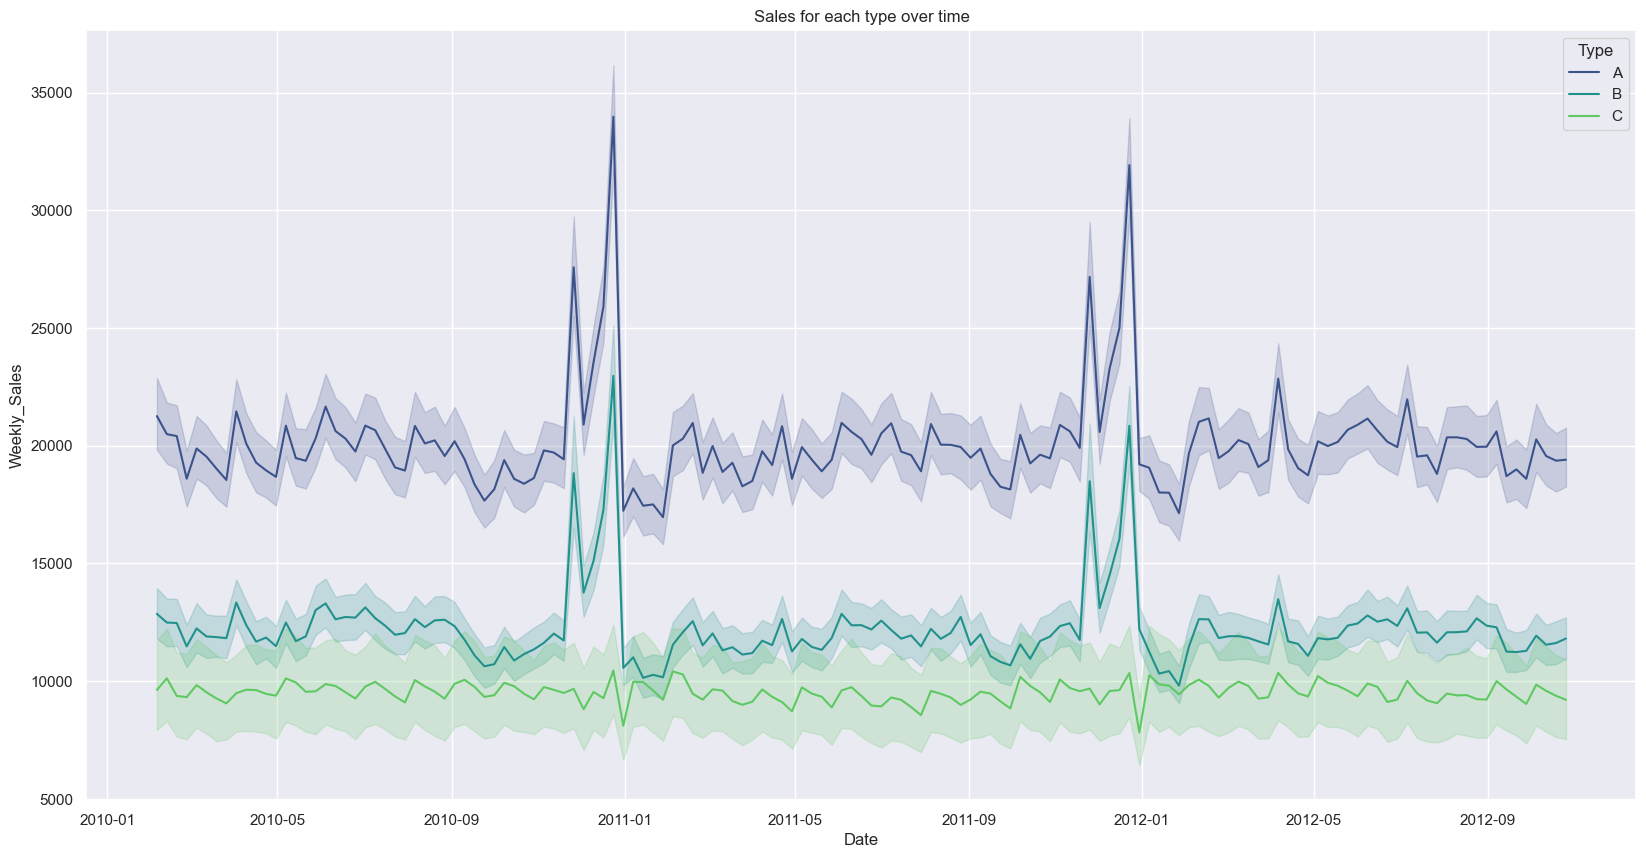

In [15]:
plt.figure(figsize=(20,10))
sns.lineplot(data=vis_data,x='Date',y='Weekly_Sales',palette='viridis',hue='Type')
plt.title("Sales for each type over time")
plt.show()

# Second Plot
- Overall Trend: Sales show a strong seasonal pattern with regular, significant spikes.

- Holiday Peaks: The largest sales peaks consistently occur at the end of each year, coinciding with the winter holiday season (e.g., Christmas). These are the highest points on the graph.

- Other Holidays: Smaller, but still noticeable, sales spikes occur at other points throughout the year, likely corresponding to holidays like Thanksgiving, Easter, or Independence Day.

- Post-Holiday Dips: Sales typically drop significantly immediately following the major holiday peaks.

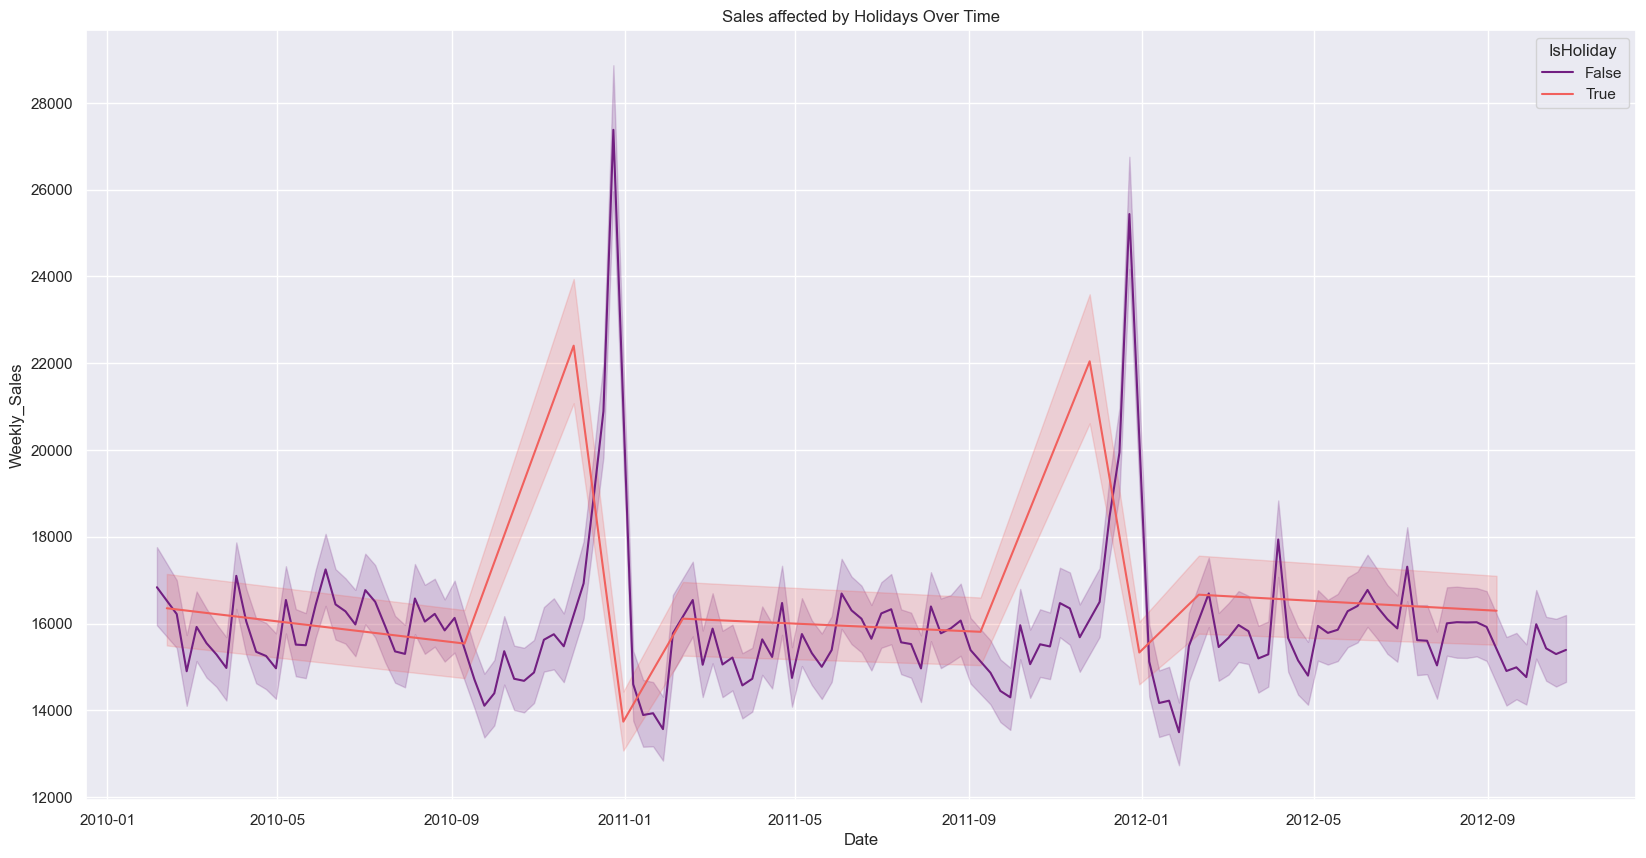

In [16]:
plt.figure(figsize=(20,10))
sns.lineplot(data=vis_data,x='Date',y='Weekly_Sales',palette='magma',hue='IsHoliday')
plt.title("Sales affected by Holidays Over Time")
plt.show()

# Third PLot

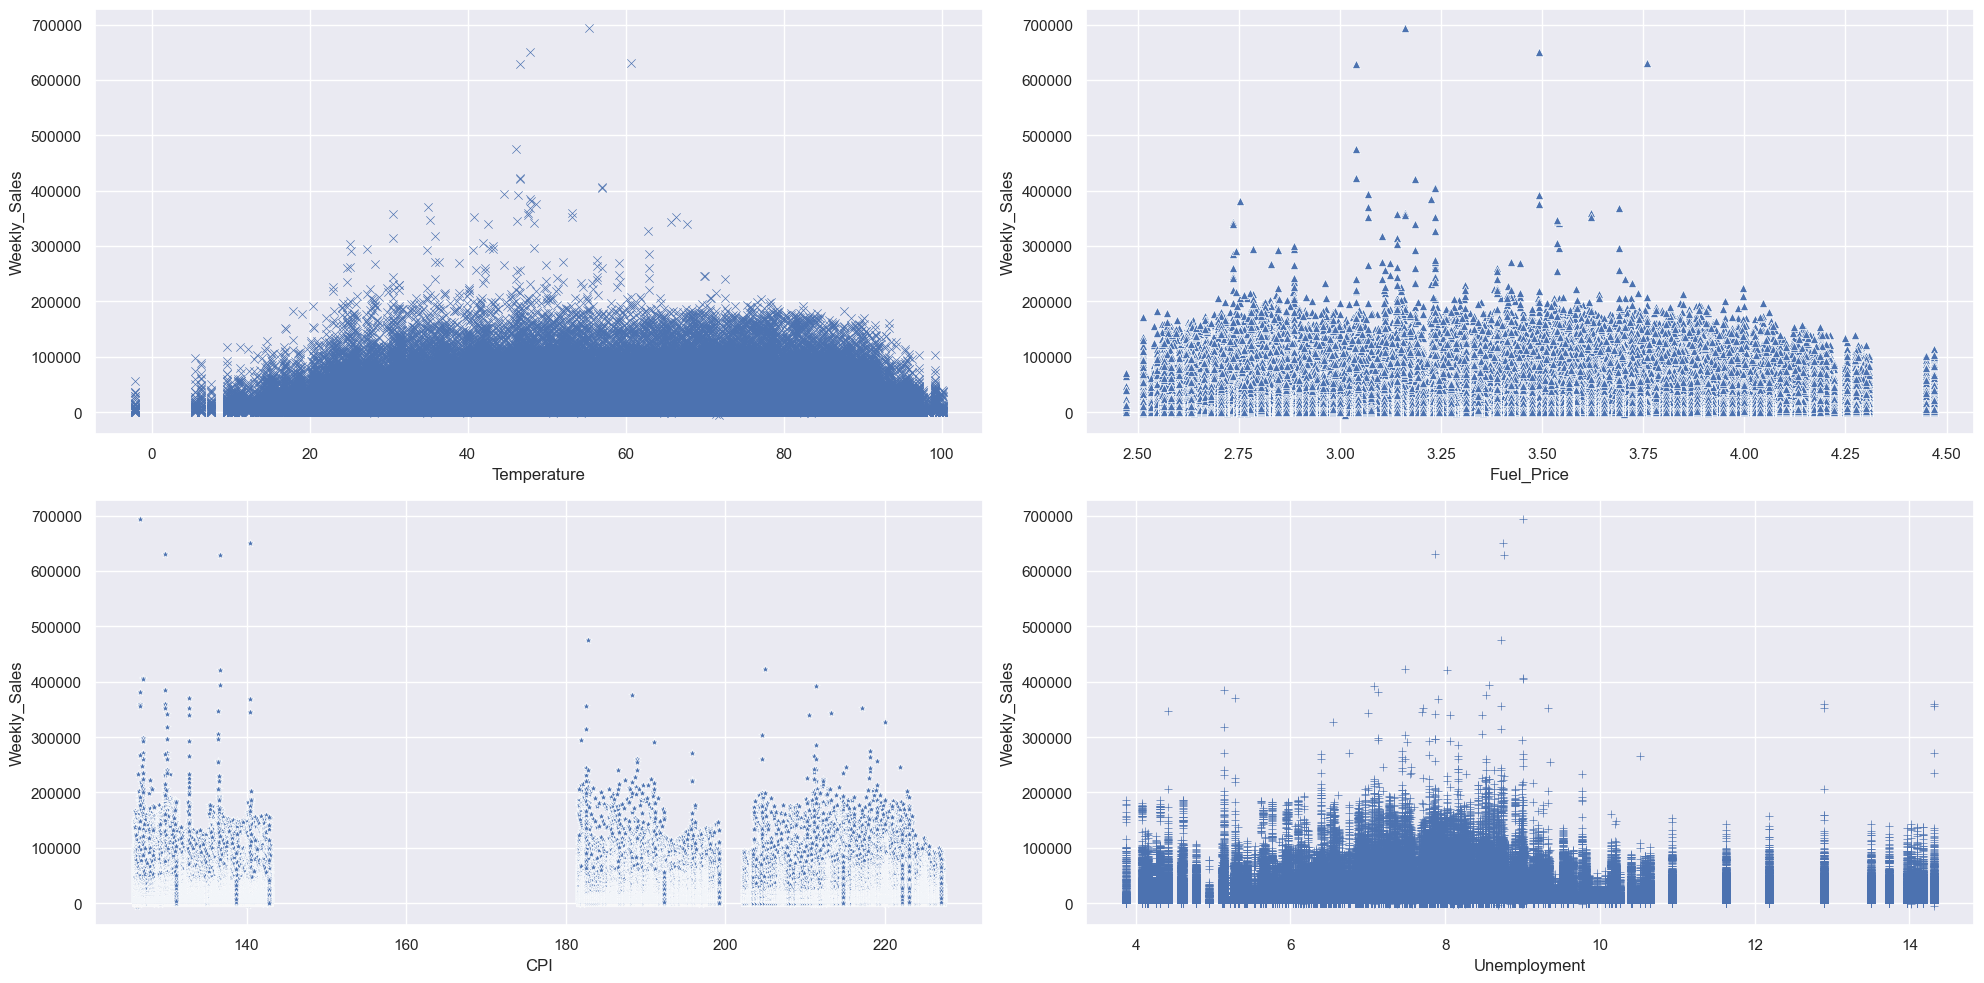

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(data=vis_data,x='Temperature',y='Weekly_Sales',marker='x')

plt.subplot(2,2,2)
sns.scatterplot(data=vis_data,x='Fuel_Price',y='Weekly_Sales',marker='^')

plt.subplot(2,2,3)
sns.scatterplot(data=vis_data,x='CPI',y='Weekly_Sales',marker='*')

plt.subplot(2,2,4)
sns.scatterplot(data=vis_data,x='Unemployment',y='Weekly_Sales',marker='+')

plt.tight_layout()
plt.show(
)

# Fourth Plot

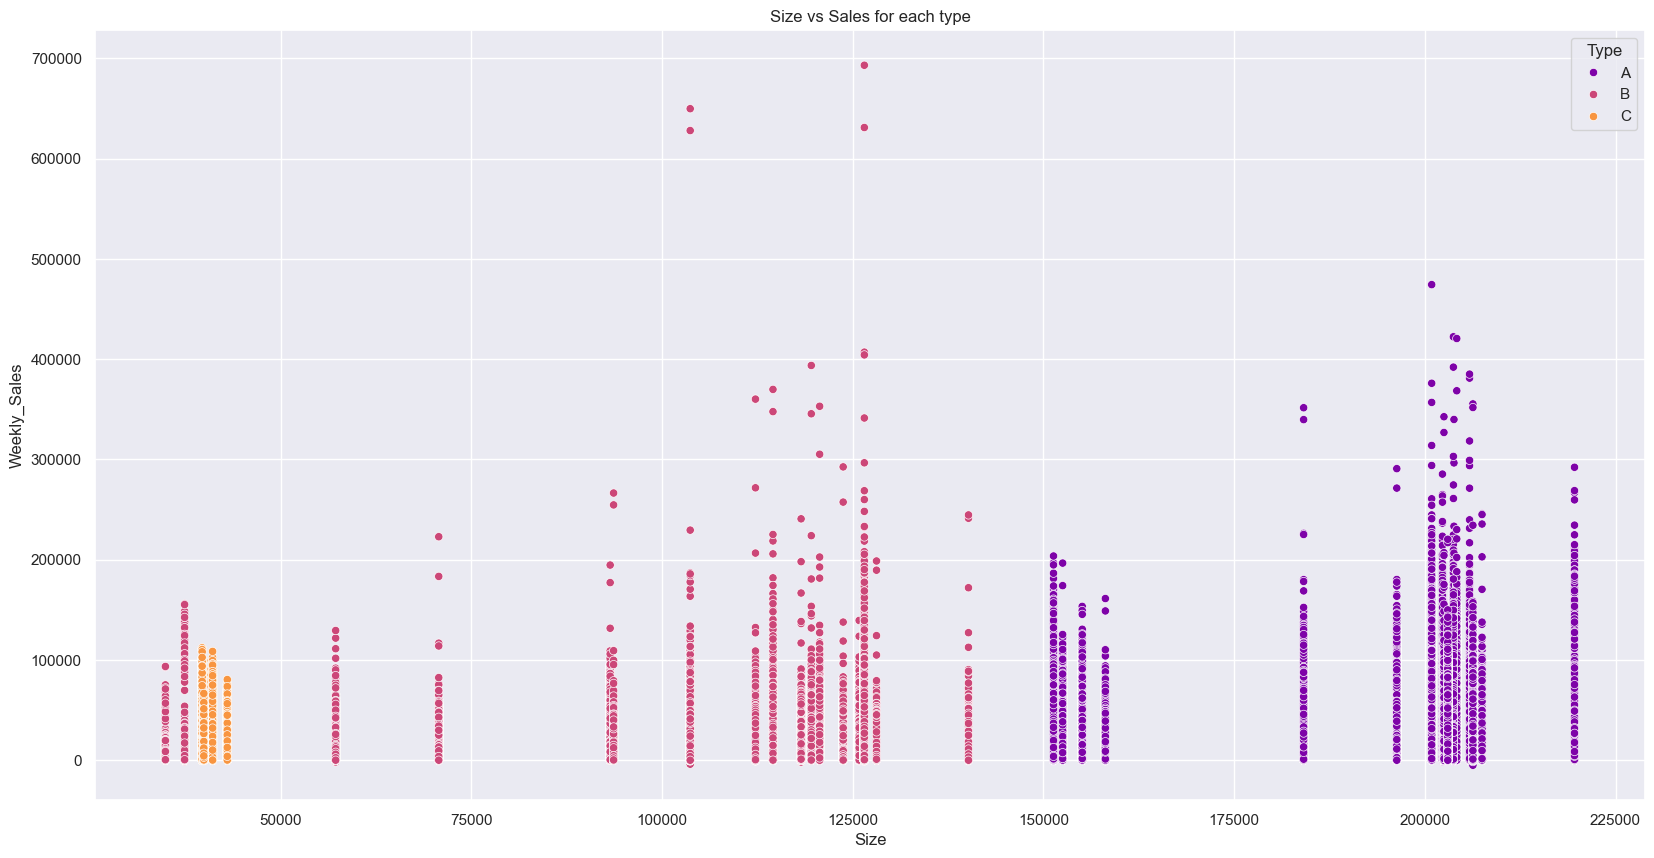

In [18]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=vis_data,x='Size',y='Weekly_Sales',hue='Type',palette='plasma')
plt.title("Size vs Sales for each type")
plt.show()

# Data Cleaning

In [19]:
df.isna().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

In [20]:
df.fillna(0,inplace=True)

In [21]:
df.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [22]:
df.describe().round()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size
count,421570.0,421570.0,421570.0,421570.0,421570.0,421570.0,421570.0,421570.0,421570.0,421570.0,421570.0,421570.0,421570.0
mean,22.0,60.0,3.0,2590.0,880.0,468.0,1083.0,1663.0,171.0,8.0,44.0,15981.0,136728.0
std,13.0,18.0,0.0,6052.0,5085.0,5529.0,3895.0,4208.0,39.0,2.0,30.0,22711.0,60981.0
min,1.0,-2.0,2.0,0.0,-266.0,-29.0,0.0,0.0,126.0,4.0,1.0,-4989.0,34875.0
25%,11.0,47.0,3.0,0.0,0.0,0.0,0.0,0.0,132.0,7.0,18.0,2080.0,93638.0
50%,22.0,62.0,3.0,0.0,0.0,0.0,0.0,0.0,182.0,8.0,37.0,7612.0,140167.0
75%,33.0,74.0,4.0,2809.0,2.0,5.0,425.0,2168.0,212.0,9.0,74.0,20206.0,202505.0
max,45.0,100.0,4.0,88647.0,104520.0,141631.0,67475.0,108519.0,227.0,14.0,99.0,693099.0,219622.0


In [23]:
df.loc[df['Weekly_Sales'] <= 0].shape    # Wrong Values

(1358, 16)

In [24]:
df = df.loc[df['Weekly_Sales'] > 0]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Date          420212 non-null  object 
 2   Temperature   420212 non-null  float64
 3   Fuel_Price    420212 non-null  float64
 4   MarkDown1     420212 non-null  float64
 5   MarkDown2     420212 non-null  float64
 6   MarkDown3     420212 non-null  float64
 7   MarkDown4     420212 non-null  float64
 8   MarkDown5     420212 non-null  float64
 9   CPI           420212 non-null  float64
 10  Unemployment  420212 non-null  float64
 11  IsHoliday     420212 non-null  bool   
 12  Dept          420212 non-null  int64  
 13  Weekly_Sales  420212 non-null  float64
 14  Type          420212 non-null  object 
 15  Size          420212 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.7+ MB


In [26]:
df['Date'] = pd.to_datetime(df['Date'])

# Encoding Object Values

In [27]:
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [28]:
df['Type'].replace({'A':1,'B':2,'C':3},inplace=True)

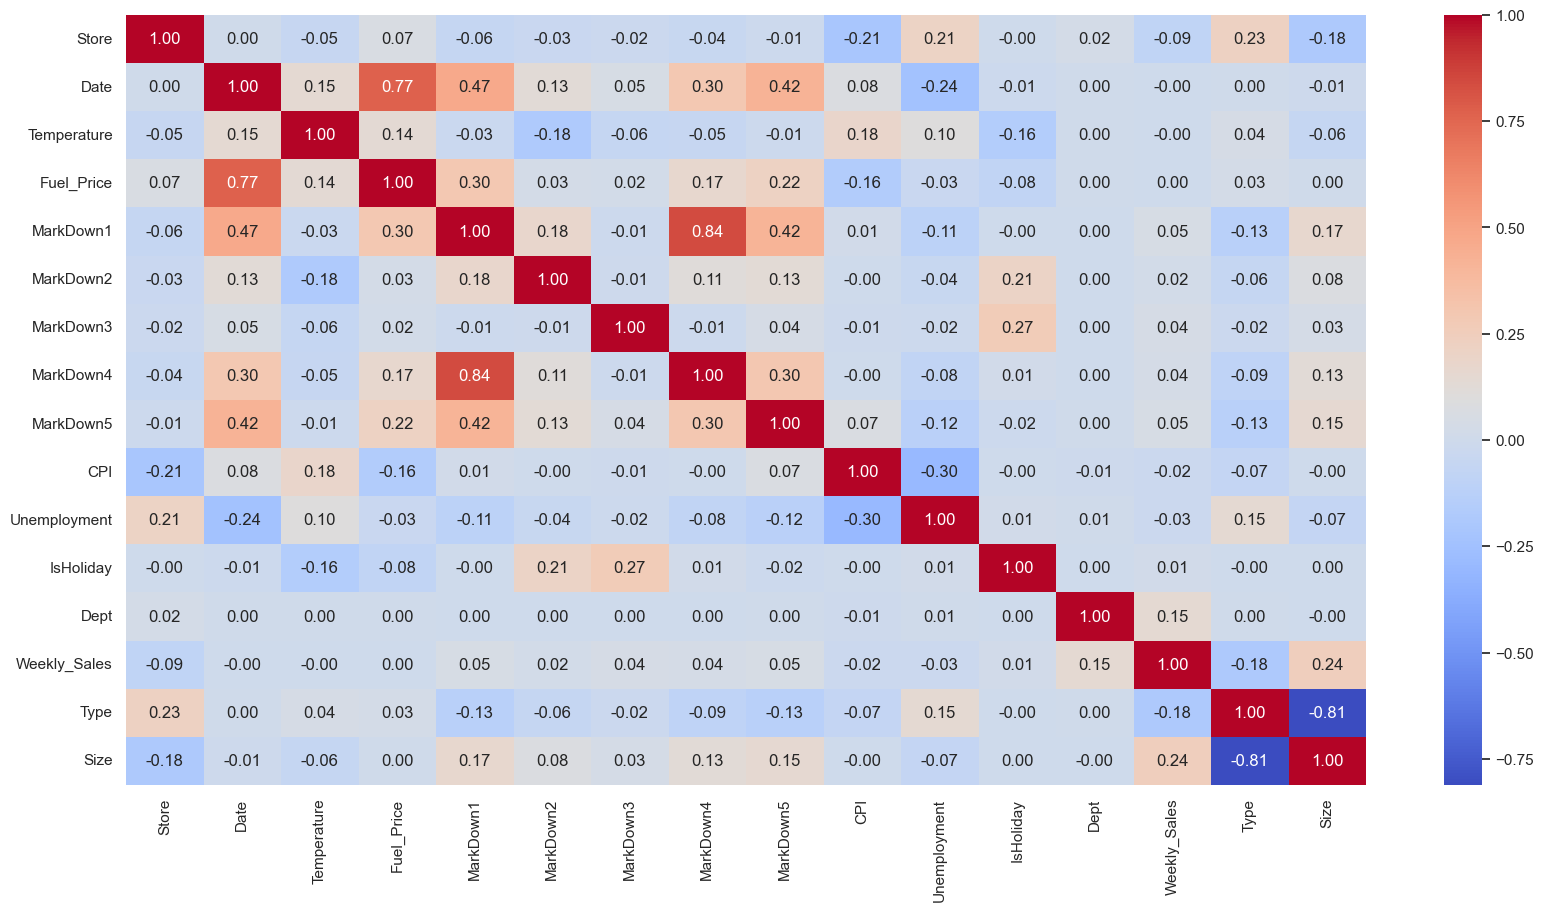

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

# Feature Engineering 

In [30]:
def creat_lags(df):
    new_df = df.copy()
    new_df['day'] = df['Date'].dt.day
    new_df['month'] = df['Date'].dt.day
    new_df['year'] = df['Date'].dt.year
    new_df["dayofweek"] = df["Date"].dt.dayofweek   # Monday=0, Sunday=6
    new_df["weekofyear"] = df["Date"].dt.isocalendar().week
    new_df['lag_1'] = df['Weekly_Sales'].shift(1)
    new_df['lag_7'] = df['Weekly_Sales'].shift(7)
    new_df['rolling_mean_7'] = df['Weekly_Sales'].shift(1).rolling(7).mean()
    new_df['rolling_std_7'] = df['Weekly_Sales'].shift(1).rolling(7).std()
    return new_df

In [31]:
back_up_data = df.copy()

In [32]:
df = creat_lags(df)

In [33]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Size,day,month,year,dayofweek,weekofyear,lag_1,lag_7,rolling_mean_7,rolling_std_7
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,151315,5,5,2010,4,5,NaN,NaN,NaN,NaN
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,151315,5,5,2010,4,5,24924.50,NaN,NaN,NaN
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,151315,5,5,2010,4,5,50605.27,NaN,NaN,NaN
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,151315,5,5,2010,4,5,13740.12,NaN,NaN,NaN
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,151315,5,5,2010,4,5,39954.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,118221,26,26,2012,4,43,54608.75,17360.33,17749.545714,18520.324817
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,118221,26,26,2012,4,43,2487.80,717.82,15624.898571,19404.402864
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,118221,26,26,2012,4,43,5203.31,1689.10,16265.682857,18897.528005
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,118221,26,26,2012,4,43,56017.47,8187.66,24026.878571,22689.109315


In [34]:
df.drop(columns='Date',inplace=True)

In [35]:
df.dropna(inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420205 entries, 7 to 421569
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Store           420205 non-null  int64  
 1   Temperature     420205 non-null  float64
 2   Fuel_Price      420205 non-null  float64
 3   MarkDown1       420205 non-null  float64
 4   MarkDown2       420205 non-null  float64
 5   MarkDown3       420205 non-null  float64
 6   MarkDown4       420205 non-null  float64
 7   MarkDown5       420205 non-null  float64
 8   CPI             420205 non-null  float64
 9   Unemployment    420205 non-null  float64
 10  IsHoliday       420205 non-null  bool   
 11  Dept            420205 non-null  int64  
 12  Weekly_Sales    420205 non-null  float64
 13  Type            420205 non-null  int64  
 14  Size            420205 non-null  int64  
 15  day             420205 non-null  int32  
 16  month           420205 non-null  int32  
 17  year           

In [37]:
from sklearn.model_selection import TimeSeriesSplit , RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error

In [38]:
X = df.drop(columns='Weekly_Sales')
y = df['Weekly_Sales']

In [39]:
tscv = TimeSeriesSplit(n_splits=3)

# Geting Best Parameters

In [40]:
# param_grid = {
#     "max_depth": [3, 5, 7, 9],
#     "min_child_weight": [1, 3, 5],
#     "subsample": [0.6, 0.8, 1.0],
#     "colsample_bytree": [0.6, 0.8, 1.0],
#     "learning_rate": [0.01, 0.05, 0.1],
#     "n_estimators": [500, 1000],
#     "gamma": [0, 0.1, 0.3]
# }

# xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# search = RandomizedSearchCV(
#     xgb,
#     param_distributions=param_grid,
#     n_iter=10,
#     scoring="neg_mean_squared_error",
#     cv=tscv,
#     verbose=20,
#     n_jobs=-1
# )

# search.fit(X,y)

# print("Best Params:", search.best_params_) 
# Best Params: {'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
# Best Params: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.6}
# Best Params: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
# Best Params: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.6}

In [41]:
# best_model = search.best_estimator_

In [42]:
# Feature importance (option 1: sklearn API)
# print(best_model.feature_importances_)

In [43]:
# Feature importance (option 2: XGBoost API)
# print(best_model.get_booster().get_score(importance_type="gain"))

In [44]:
# importance_dict = best_model.get_booster().get_score(importance_type="gain")


# importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['gain'])


# importance_df['gain_normalized'] = importance_df['gain'] / importance_df['gain'].sum()

# print(importance_df.sort_values(by='gain_normalized', ascending=False))


# Feature Selection

| Feature        | Gain         | Gain Normalized |
|----------------|--------------|-----------------|
| Dept           | 4.682849e+10 | 0.360156        |
| Type           | 2.232504e+10 | 0.171701        |
| Size           | 1.191618e+10 | 0.091647        |
| rolling_mean_7 | 8.223518e+09 | 0.063247        |
| lag_1          | 8.042913e+09 | 0.061858        |
| rolling_std_7  | 6.490001e+09 | 0.049914        |
| lag_7          | 5.520444e+09 | 0.042458        |
| Store          | 4.620514e+09 | 0.035536        |
| weekofyear     | 3.288665e+09 | 0.025293        |
| IsHoliday      | 3.220540e+09 | 0.024769        |
| CPI            | 1.472328e+09 | 0.011324        |
| Unemployment   | 1.420252e+09 | 0.010923        |
| day            | 1.221821e+09 | 0.009397        |
| MarkDown3      | 1.060167e+09 | 0.008154        |
| month          | 9.515081e+08 | 0.007318        |
| Temperature    | 8.552182e+08 | 0.006577        |
| year           | 8.276970e+08 | 0.006366        |
| MarkDown4      | 4.984338e+08 | 0.003833        |
| Fuel_Price     | 3.463459e+08 | 0.002664        |
| MarkDown1      | 3.138182e+08 | 0.002414        |
| MarkDown2      | 2.902978e+08 | 0.002233        |
| MarkDown5      | 2.884387e+08 | 0.002218        |


In [45]:
cols_for_remove = ['MarkDown4','Fuel_Price','MarkDown1','MarkDown2','MarkDown5','day','month','Temperature','year','Unemployment','CPI']

In [46]:
tscv = TimeSeriesSplit(n_splits=5)

# Training Models

In [47]:
params = {
    "max_depth": 9,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.6,
    "gamma": 0.3,
    "min_child_weight": 5,
    "n_estimators": 500
}

rmse_scores_WithAll = []
# --- Initialize out-of-fold predictions array ---
oof_preds_2 = np.zeros(len(y))

# --- Store fold ranges for plotting (optional) ---
fold_ranges_2 = []
for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = XGBRegressor(
        **params,
        objective="reg:squarederror",
        random_state=42,
        eval_metric="rmse",
        early_stopping_rounds=50
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=500
    )
    
    y_pred = model.predict(X_val) 
    oof_preds_2[val_idx] = y_pred
    fold_ranges_2.append((val_idx[0], val_idx[-1]))
    # --- RMSE ---
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    rmse_scores_WithAll.append(rmse)

    print(f"Fold {fold+1} RMSE: {rmse:.2f}")

print(f"\nAverage RMSE: {np.mean(rmse_scores_WithAll):.2f}")

[0]	validation_0-rmse:26185.83290
[432]	validation_0-rmse:13094.40778
Fold 1 RMSE: 13081.01
[0]	validation_0-rmse:21114.00093
[499]	validation_0-rmse:7418.72429
Fold 2 RMSE: 7418.70
[0]	validation_0-rmse:20988.01583
[403]	validation_0-rmse:8281.72825
Fold 3 RMSE: 8278.25
[0]	validation_0-rmse:18396.01281
[141]	validation_0-rmse:9399.64364
Fold 4 RMSE: 9354.96
[0]	validation_0-rmse:18753.81906
[400]	validation_0-rmse:7019.87357
Fold 5 RMSE: 7011.52

Average RMSE: 9028.89


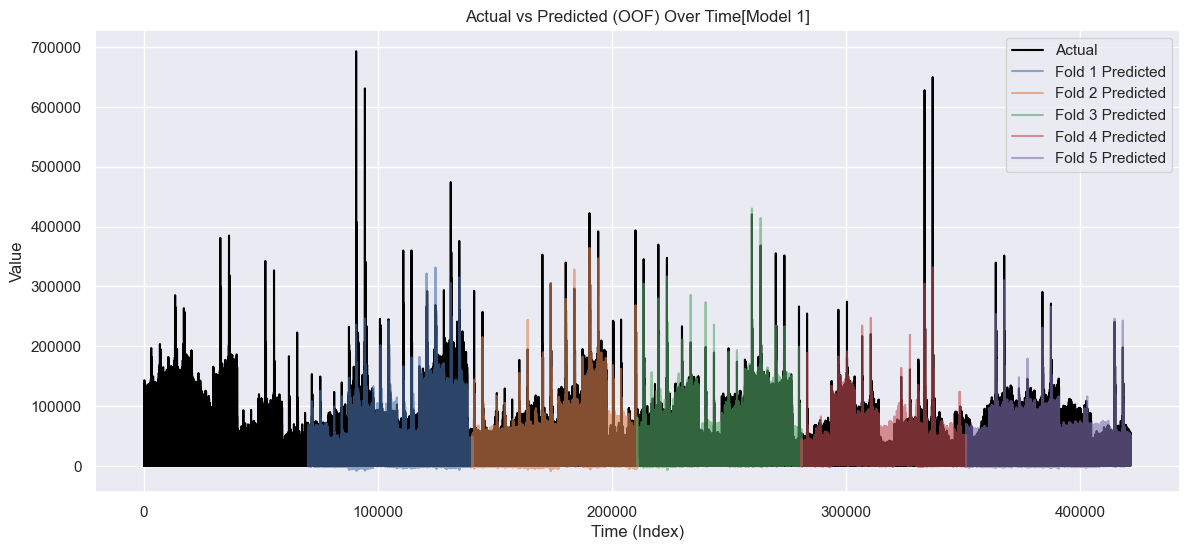

In [48]:
plt.figure(figsize=(14,6))
plt.plot(y.index, y.values, label="Actual", color="black")

for start, end in fold_ranges_2:
    plt.plot(
        y.index[start:end+1], oof_preds_2[start:end+1], 
        label=f"Fold {fold_ranges_2.index((start,end))+1} Predicted",
        alpha=0.6
    )

plt.xlabel("Time (Index)")
plt.ylabel("Value")
plt.title("Actual vs Predicted (OOF) Over Time[Model 1]")
plt.legend()
plt.show()

In [49]:
X_without = X.drop(columns=cols_for_remove)

In [50]:
# --- Segmentation helper ---
def segment_metrics(y_true, y_pred):
    """Return RMSE for low, medium, high segments."""
    results = {}
    low_mask = y_true < y_true.median() * 0.5
    med_mask = (y_true >= y_true.median() * 0.5) & (y_true <= y_true.median() * 1.5)
    high_mask = y_true > y_true.median() * 1.5

    for name, mask in zip(["Low", "Medium", "High"], [low_mask, med_mask, high_mask]):
        if mask.sum() > 0:
            mse = mean_squared_error(y_true[mask], y_pred[mask])
            results[name] = np.sqrt(mse)
        else:
            results[name] = np.nan
    return results


params = {
    "max_depth": 9,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.6,
    "gamma": 0.3,
    "min_child_weight": 5,
    "n_estimators": 500
}

rmse_scores = []
seg_scores = {"Low": [], "Medium": [], "High": []}

# --- Initialize out-of-fold predictions array ---
oof_preds = np.zeros(len(y))

# --- Store fold ranges for plotting (optional) ---
fold_ranges = []

for fold, (train_idx, val_idx) in enumerate(tscv.split(X_without)):
    X_train, X_val = X_without.iloc[train_idx], X_without.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model2 = XGBRegressor(
        **params,
        objective="reg:squarederror",
        random_state=42,
        eval_metric="rmse",
        early_stopping_rounds=50
    )

    model2.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=500
    )
    
    y_pred = model2.predict(X_val)

    # Store predictions in the correct positions
    oof_preds[val_idx] = y_pred
    fold_ranges.append((val_idx[0], val_idx[-1]))
    # --- Global RMSE ---
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

    # --- Segment RMSE ---
    seg_rmse = segment_metrics(y_val, y_pred)
    for k in seg_scores:
        seg_scores[k].append(seg_rmse[k])

    print(f"Fold {fold+1} RMSE: {rmse:.2f} | Segments: {seg_rmse}")

print(f"\n=== Final Results ===")
print(f"Average RMSE: {np.mean(rmse_scores):.2f}")
for seg in seg_scores:
    print(f"{seg} Segment → Avg RMSE={np.nanmean(seg_scores[seg]):.2f}")


[0]	validation_0-rmse:26782.72353
[332]	validation_0-rmse:13454.13210
Fold 1 RMSE: 13452.09 | Segments: {'Low': 3186.438842042703, 'Medium': 5326.34985244371, 'High': 20994.580848787307}
[0]	validation_0-rmse:21684.50140
[499]	validation_0-rmse:7603.38006
Fold 2 RMSE: 7603.38 | Segments: {'Low': 3410.0378499635167, 'Medium': 4158.340056003469, 'High': 11137.032244171905}
[0]	validation_0-rmse:21631.60713
[333]	validation_0-rmse:7815.44773
Fold 3 RMSE: 7805.30 | Segments: {'Low': 2921.2227033872223, 'Medium': 4994.609497819584, 'High': 11527.24193997593}
[0]	validation_0-rmse:18819.48239
[237]	validation_0-rmse:8815.94889
Fold 4 RMSE: 8801.57 | Segments: {'Low': 6336.443561711818, 'Medium': 5989.410731243565, 'High': 11551.106481081384}
[0]	validation_0-rmse:19186.33416
[330]	validation_0-rmse:6707.21911
Fold 5 RMSE: 6699.53 | Segments: {'Low': 2855.1336399504808, 'Medium': 3163.3587190002036, 'High': 9745.649092037509}

=== Final Results ===
Average RMSE: 8872.38
Low Segment → Avg RMSE

# Plot actual vs. predicted values over time

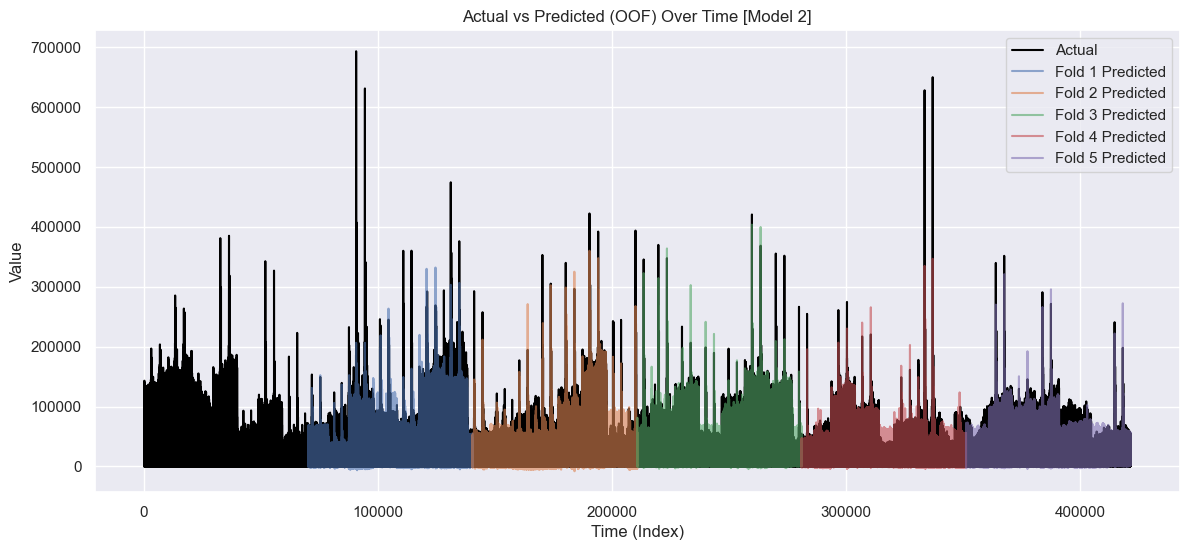

In [51]:
plt.figure(figsize=(14,6))
plt.plot(y.index, y.values, label="Actual", color="black")

for start, end in fold_ranges:
    plt.plot(
        y.index[start:end+1], oof_preds[start:end+1], 
        label=f"Fold {fold_ranges.index((start,end))+1} Predicted",
        alpha=0.6
    )

plt.xlabel("Time (Index)")
plt.ylabel("Value")
plt.title("Actual vs Predicted (OOF) Over Time [Model 2]")
plt.legend()
plt.show()

In [52]:
params = {
    "max_depth": 9,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.6,
    "gamma": 0.3,
    "min_child_weight": 5,
    "n_estimators": 500
}

rmse_scores = []
seg_scores = {"Low": [], "Medium": [], "High": []}
# --- Initialize out-of-fold predictions array ---
oof_preds_3 = np.zeros(len(y))

# --- Store fold ranges for plotting (optional) ---
fold_ranges_3 = []
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_without)):
    X_train, X_val = X_without.iloc[train_idx], X_without.iloc[val_idx]
    y_train_raw, y_val_raw = y.iloc[train_idx], y.iloc[val_idx]

    # --- log transform ---
    y_train = np.log1p(y_train_raw)
    y_val = np.log1p(y_val_raw)

    model2 = XGBRegressor(
        **params,
        objective="reg:squarederror",
        random_state=42,
        eval_metric="rmse",
        early_stopping_rounds=50
    )

    model2.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=500
    )
    
    # --- predictions back to original scale ---
    y_pred_log = model2.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    # Store predictions in the correct positions
    oof_preds_3[val_idx] = y_pred
    fold_ranges_3.append((val_idx[0], val_idx[-1]))

    # --- Global RMSE ---
    rmse = np.sqrt(mean_squared_error(y_val_raw, y_pred))
    rmse_scores.append(rmse)

    # --- Segment RMSE (on original scale) ---
    seg_rmse = segment_metrics(y_val_raw, y_pred)
    for k in seg_scores:
        seg_scores[k].append(seg_rmse[k])

    print(f"Fold {fold+1} RMSE: {rmse:.2f} | Segments: {seg_rmse}")

print(f"\n=== Final Results with log(y) ===")
print(f"Average RMSE: {np.mean(rmse_scores):.2f}")
for seg in seg_scores:
    print(f"{seg} Segment → Avg RMSE={np.nanmean(seg_scores[seg]):.2f}")


[0]	validation_0-rmse:1.79757
[284]	validation_0-rmse:0.91275
Fold 1 RMSE: 18312.04 | Segments: {'Low': 1779.7788707614093, 'Medium': 4919.2860637002905, 'High': 29176.410099509954}
[0]	validation_0-rmse:1.80931
[339]	validation_0-rmse:0.73644
Fold 2 RMSE: 8939.89 | Segments: {'Low': 1272.1461557317334, 'Medium': 3164.5654914054126, 'High': 13894.533991369855}
[0]	validation_0-rmse:1.75701
[163]	validation_0-rmse:0.74325
Fold 3 RMSE: 9320.52 | Segments: {'Low': 1525.001333605675, 'Medium': 3882.368221823625, 'High': 14600.683682553567}
[0]	validation_0-rmse:2.35777
[161]	validation_0-rmse:1.74271
Fold 4 RMSE: 10011.03 | Segments: {'Low': 4368.867514017142, 'Medium': 3972.1294261767966, 'High': 14790.466681496651}
[0]	validation_0-rmse:2.36925
[363]	validation_0-rmse:0.76283
Fold 5 RMSE: 9129.55 | Segments: {'Low': 858.1116519027817, 'Medium': 2675.1709331458824, 'High': 13962.087400499793}

=== Final Results with log(y) ===
Average RMSE: 11142.61
Low Segment → Avg RMSE=1960.78
Medium S

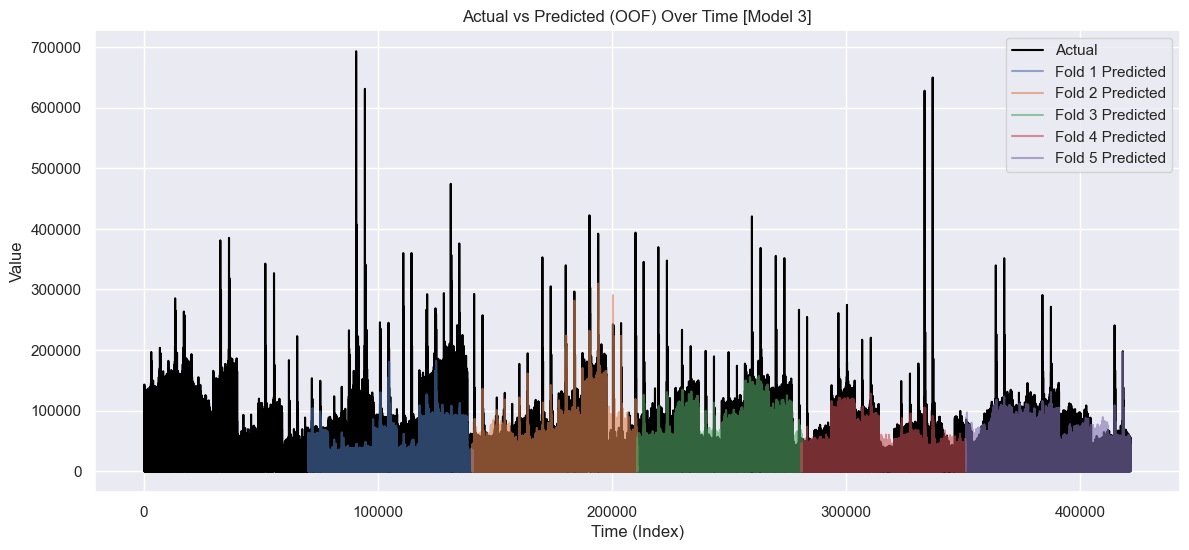

In [53]:
plt.figure(figsize=(14,6))
plt.plot(y.index, y.values, label="Actual", color="black")

for start, end in fold_ranges_3:
    plt.plot(
        y.index[start:end+1], oof_preds_3[start:end+1], 
        label=f"Fold {fold_ranges_3.index((start,end))+1} Predicted",
        alpha=0.6
    )

plt.xlabel("Time (Index)")
plt.ylabel("Value")
plt.title("Actual vs Predicted (OOF) Over Time [Model 3]")
plt.legend()
plt.show()

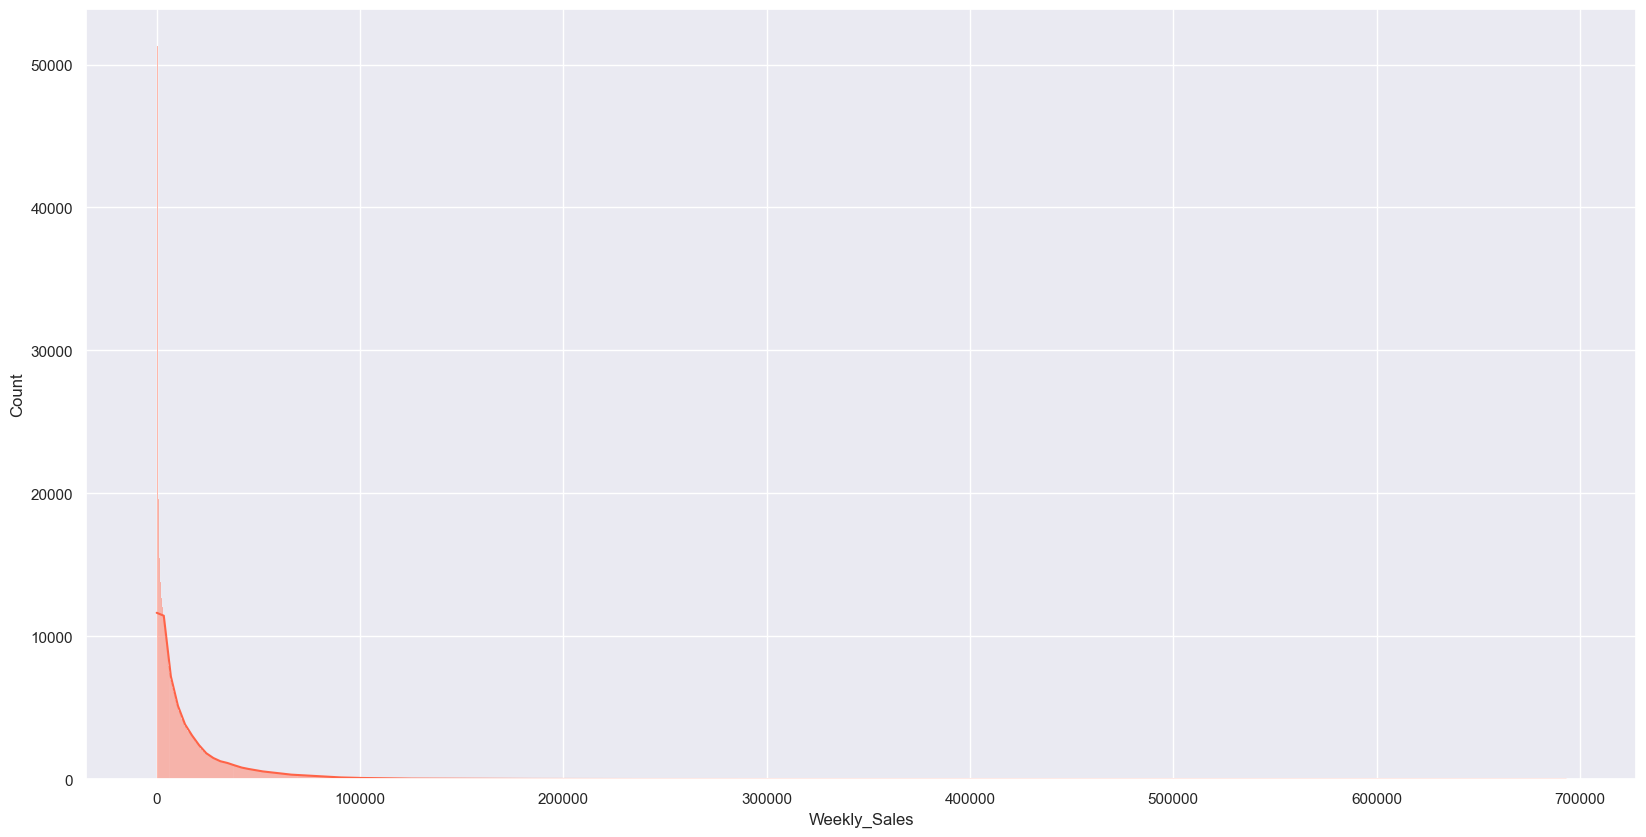

In [54]:
plt.figure(figsize=(20,10))
sns.histplot(x=df['Weekly_Sales'],kde=True,color='tomato')
plt.show()

In [55]:
low_mask = df['Weekly_Sales'] < df['Weekly_Sales'].median() * 0.5
med_mask = (df['Weekly_Sales'] >= df['Weekly_Sales'].median() * 0.5) & (df['Weekly_Sales'] <= df['Weekly_Sales'].median() * 1.5)
high_mask = df['Weekly_Sales'] > df['Weekly_Sales'].median() * 1.5

In [56]:
len(df[low_mask])

145914

In [57]:
len(df[med_mask])

107799

In [58]:
len(df[high_mask])

166492

| Model                                    | Average RMSE | Low Segment RMSE | Medium Segment RMSE | High Segment RMSE |
|------------------------------------------|--------------|------------------|----------------------|-------------------|
| Without Feature Selection                | 9028.89      | -                | -                    | -                 |
| With Feature Selection (No Log y)        | **8872.38**  | 3741.86          | 4726.41              | **12991.12**      |
| With Feature Selection + Log y           | 11142.61     | **1960.78**      | **3722.70**          | 17284.84          |


# 📌 Conclusion

After evaluating multiple model setups, the **Feature Selection (No Log y)** configuration achieved the **best overall RMSE (8872.38)** and also the **lowest RMSE in the High Segment (12991.12)**.  

Since the **High Segment** represents the **largest portion of the dataset**:

- Low Segment count: **145,914**  
- Medium Segment count: **107,799**  
- High Segment count: **166,492**  

…it is critical to optimize performance for this group.  
Therefore, I will **retrain the final model on all available data using Feature Selection (No Log y)**, as it balances global accuracy with strong performance on the most important segment.


# Final Model

In [59]:
params = {
    "max_depth": 9,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.6,
    "gamma": 0.3,
    "min_child_weight": 5,
    "n_estimators": 500
}

In [60]:
from sklearn.metrics import r2_score

Test RMSE: 5632.741335373199
R²: 0.907079405434173


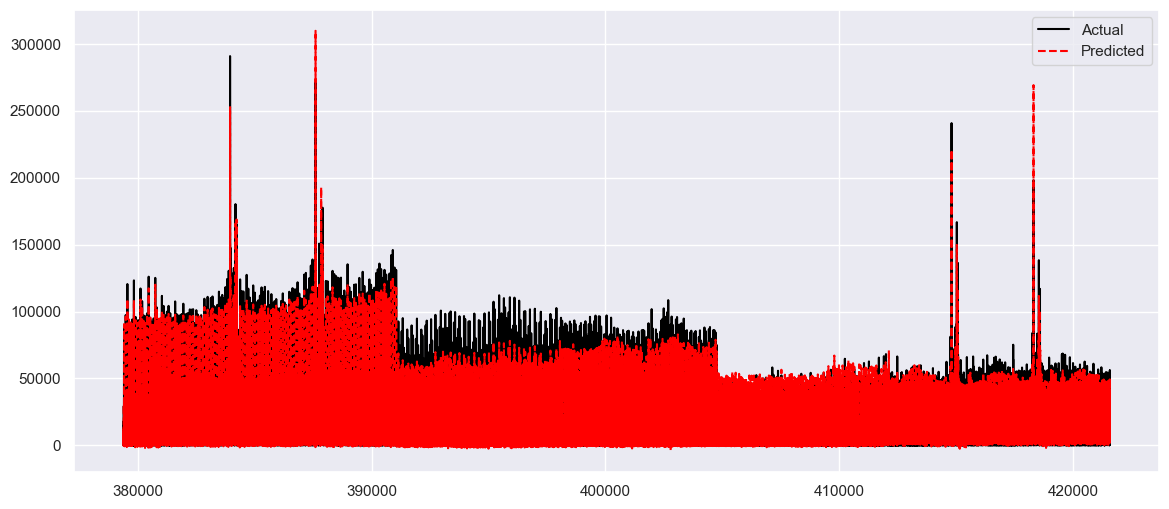

In [62]:
test_size = int(len(X_without) * 0.1)
X_train, X_test = X_without.iloc[:-test_size], X_without.iloc[-test_size:]
y_train, y_test = y.iloc[:-test_size], y.iloc[-test_size:]

final_model = XGBRegressor(**params, objective="reg:squarederror", random_state=42)
final_model.fit(X_train, y_train)

y_pred_test = final_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse)
r2 = r2_score(y_test, y_pred_test)
print("R²:", r2)

plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test.values, label="Actual", color="black")
plt.plot(y_test.index, y_pred_test, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.show()

# Save Model For Deployment

In [63]:
final_model.save_model("Elevvo_Time_model.json")

In [64]:
X_test

,Store,MarkDown3,IsHoliday,Dept,Type,Size,dayofweek,weekofyear,lag_1,lag_7,rolling_mean_7,rolling_std_7
379394,40,303.31,False,46,1,155083,4,21,2564.35,1507.00,13442.645714,19594.062125
379395,40,303.31,False,48,1,155083,4,21,10313.01,2034.38,14700.647143,18972.878148
379396,40,303.31,False,49,1,155083,4,21,768.00,47833.53,14519.735714,19119.256705
379397,40,303.31,False,52,1,155083,4,21,17.82,35314.37,7688.920000,12696.142643
379398,40,303.31,False,54,1,155083,4,21,972.04,346.00,2782.872857,3665.563335
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,100.00,False,93,2,118221,4,43,54608.75,17360.33,17749.545714,18520.324817
421566,45,100.00,False,94,2,118221,4,43,2487.80,717.82,15624.898571,19404.402864
421567,45,100.00,False,95,2,118221,4,43,5203.31,1689.10,16265.682857,18897.528005
421568,45,100.00,False,97,2,118221,4,43,56017.47,8187.66,24026.878571,22689.109315


In [65]:
y_test

379394    10313.01
379395      768.00
379396       17.82
379397      972.04
379398       12.00
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 42020, dtype: float64

In [68]:
pred_df = pd.DataFrame(y_pred_test, index=X_test.index, columns=['Pred_Values'])
pred_df

,Pred_Values
379394,14059.535156
379395,1630.757568
379396,2103.155273
379397,-691.864441
379398,55.231091
...,...
421565,5154.961914
421566,959.421997
421567,49285.378906
421568,6264.122559


In [73]:
vis_data = vis_data.join(pred_df, how="left")

In [78]:
vis_data.to_csv('Walmart_Data.csv',index=False)

In [79]:
vis_data[vis_data['Pred_Values'].notna()].to_csv('Walmart_Data_C.csv',index=False)